In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/nutrition-facts-classification/dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam

2024-05-31 04:38:08.440132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 04:38:08.440265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 04:38:08.558653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

# Import Data

In [4]:
path = '/kaggle/input/nutrition-facts-classification/dataset.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df

,user,lemak,protein,karbohidrat,gula,class
0,0,81.11,0.85,0.06,0.06,0
1,2,78.30,0.49,2.87,0.06,1
2,2,99.48,0.28,0.00,0.00,1
3,3,28.74,21.40,2.34,0.50,2
4,1,29.68,23.24,2.79,0.51,1
...,...,...,...,...,...,...
9313,2,2.39,19.71,0.00,0.00,0
9314,1,0.89,13.23,0.00,0.00,0
9315,2,0.52,19.24,0.00,0.00,0
9316,0,0.78,13.07,0.00,0.00,0


# Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user         9318 non-null   int64  
 1   lemak        9318 non-null   float64
 2   protein      9318 non-null   float64
 3   karbohidrat  9318 non-null   float64
 4   gula         9318 non-null   float64
 5   class        9318 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 436.9 KB


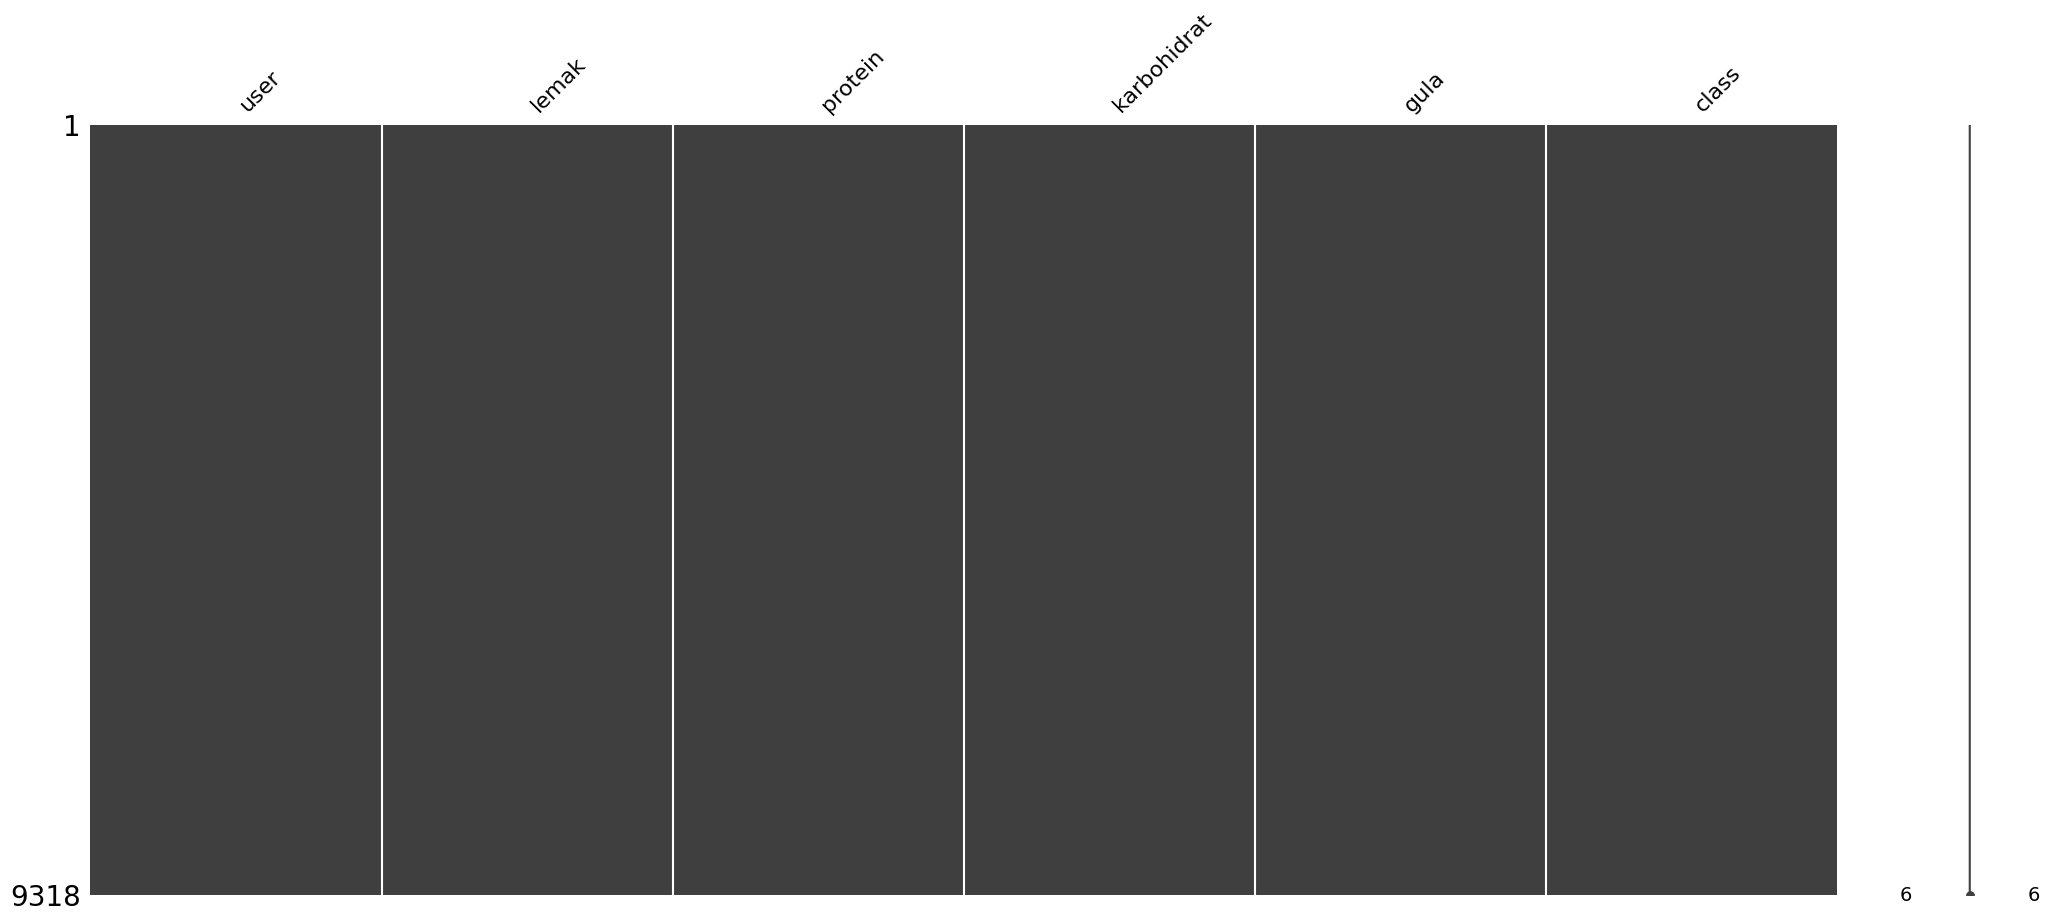

In [8]:
import missingno as msno

msno.matrix(df)
plt.show()

In [9]:
df.isna().sum()

user           0
lemak          0
protein        0
karbohidrat    0
gula           0
class          0
dtype: int64

In [10]:
# duplicated value
df.duplicated().sum()

274

In [11]:
# Dropping the Duplicate Observations
df.drop_duplicates(ignore_index=True, inplace=True)

# Exploratory Data Analysis

In [12]:
df.describe(include="all")

,user,lemak,protein,karbohidrat,gula,class
count,9044.000000,9044.000000,9044.000000,9044.000000,9044.000000,9044.000000
mean,1.498673,9.322044,11.541451,21.809592,6.637339,0.862561
std,1.118194,12.631686,10.444261,27.124502,13.602733,0.750551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.850000,2.470000,0.040000,0.000000,0.000000
50%,1.000000,4.800000,8.405000,9.025000,0.510000,1.000000
75%,2.000000,12.900000,20.060000,33.645000,5.740000,1.000000
max,3.000000,100.000000,88.320000,100.000000,99.800000,3.000000


In [13]:
# Melihat jumlah data per kelas
class_counts = df['class'].value_counts()
print(class_counts)

class
1    4268
0    3091
2    1522
3     163
Name: count, dtype: int64


In [14]:
# Melihat jumlah data per kategori user
class_counts = df['user'].value_counts()
print(class_counts)

user
1    2265
0    2264
3    2259
2    2256
Name: count, dtype: int64


In [15]:
df_corr = df.corr()
df_corr['class'].sort_values(ascending = False)

class          1.000000
gula           0.505404
karbohidrat    0.498784
user           0.433346
lemak          0.326684
protein        0.160914
Name: class, dtype: float64

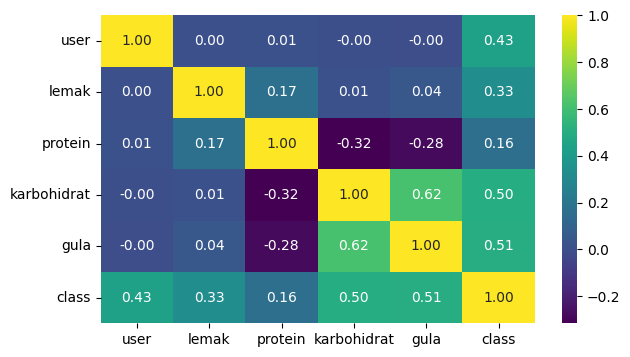

In [16]:
plt.figure(figsize = (7, 4))
sns.heatmap(df_corr, fmt=".2f", annot=True, cmap='viridis')
plt.show()

In [17]:
num_vars = ['lemak', 'protein', 'karbohidrat', 'gula']

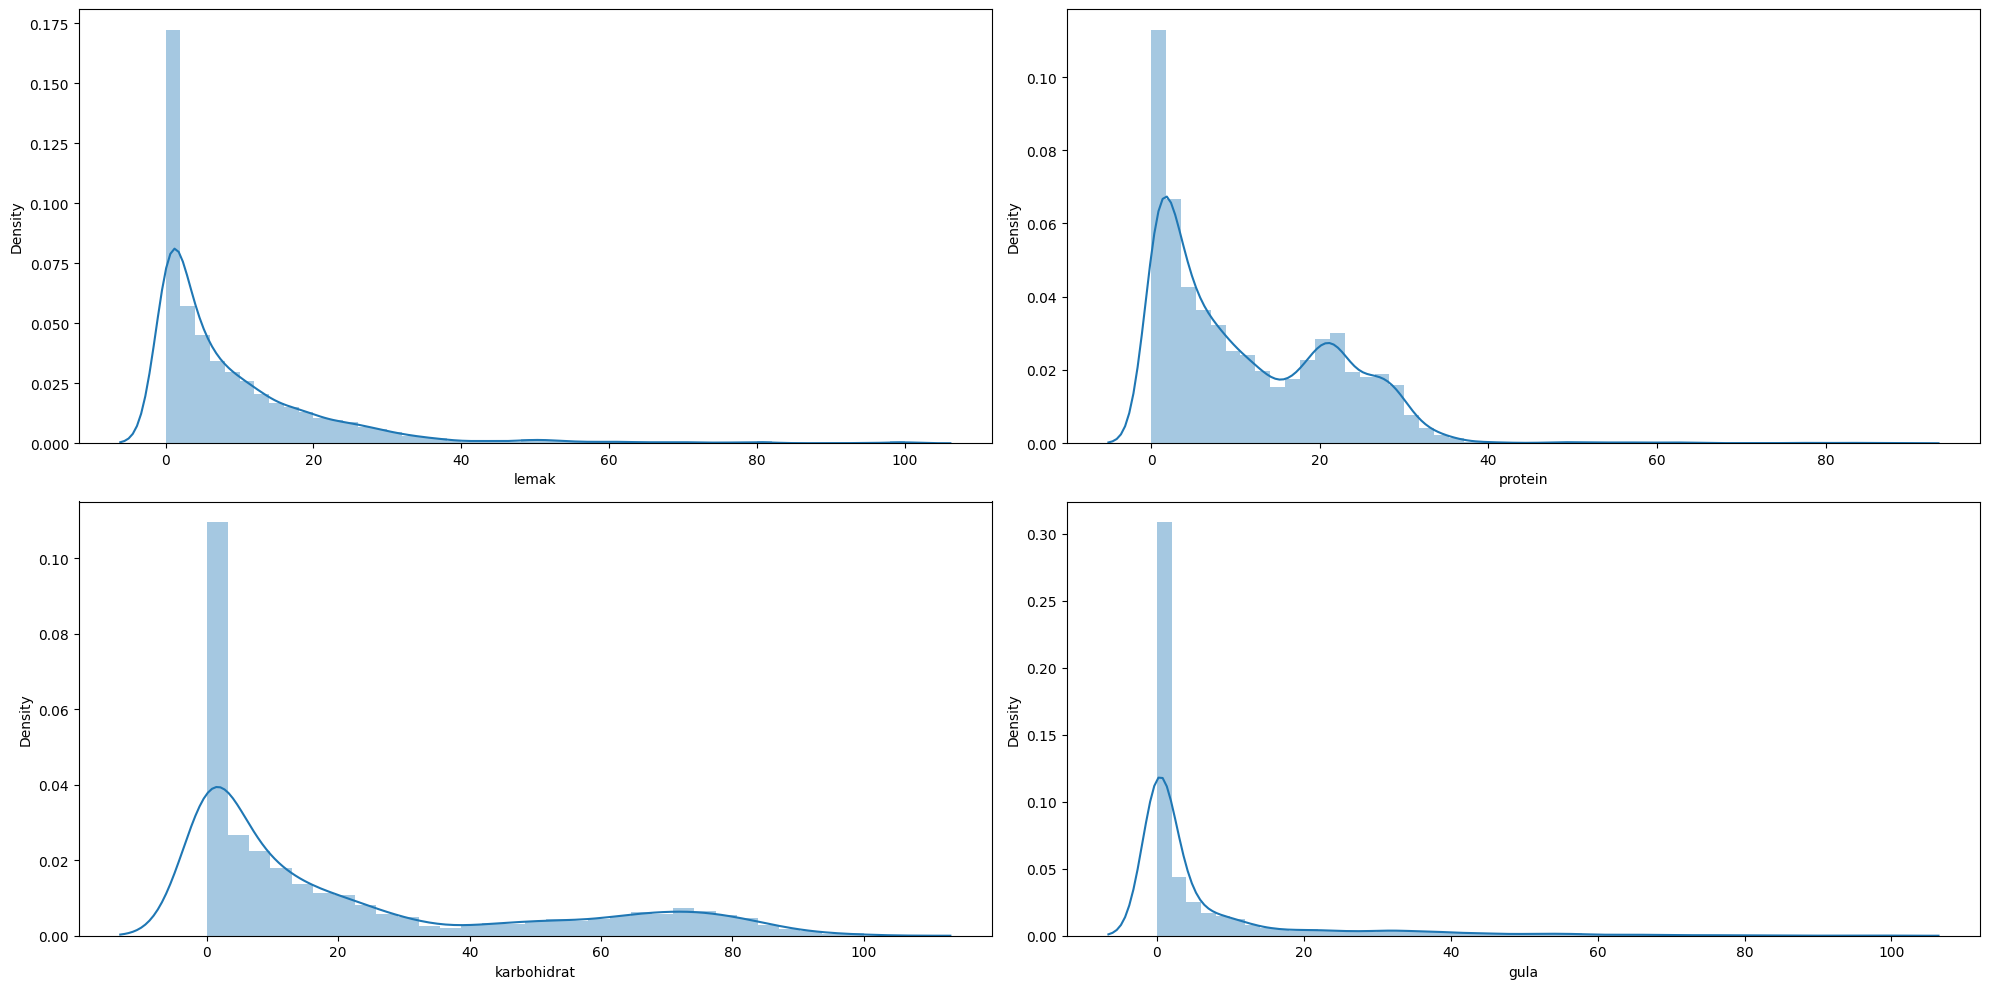

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.distplot(df[num_vars].iloc[:,i], kde=True, ax=ax[i])
plt.tight_layout()
# plt.savefig('plots/Distribution Plots for Numerical Data.png', bbox_inches = 'tight')
plt.show()

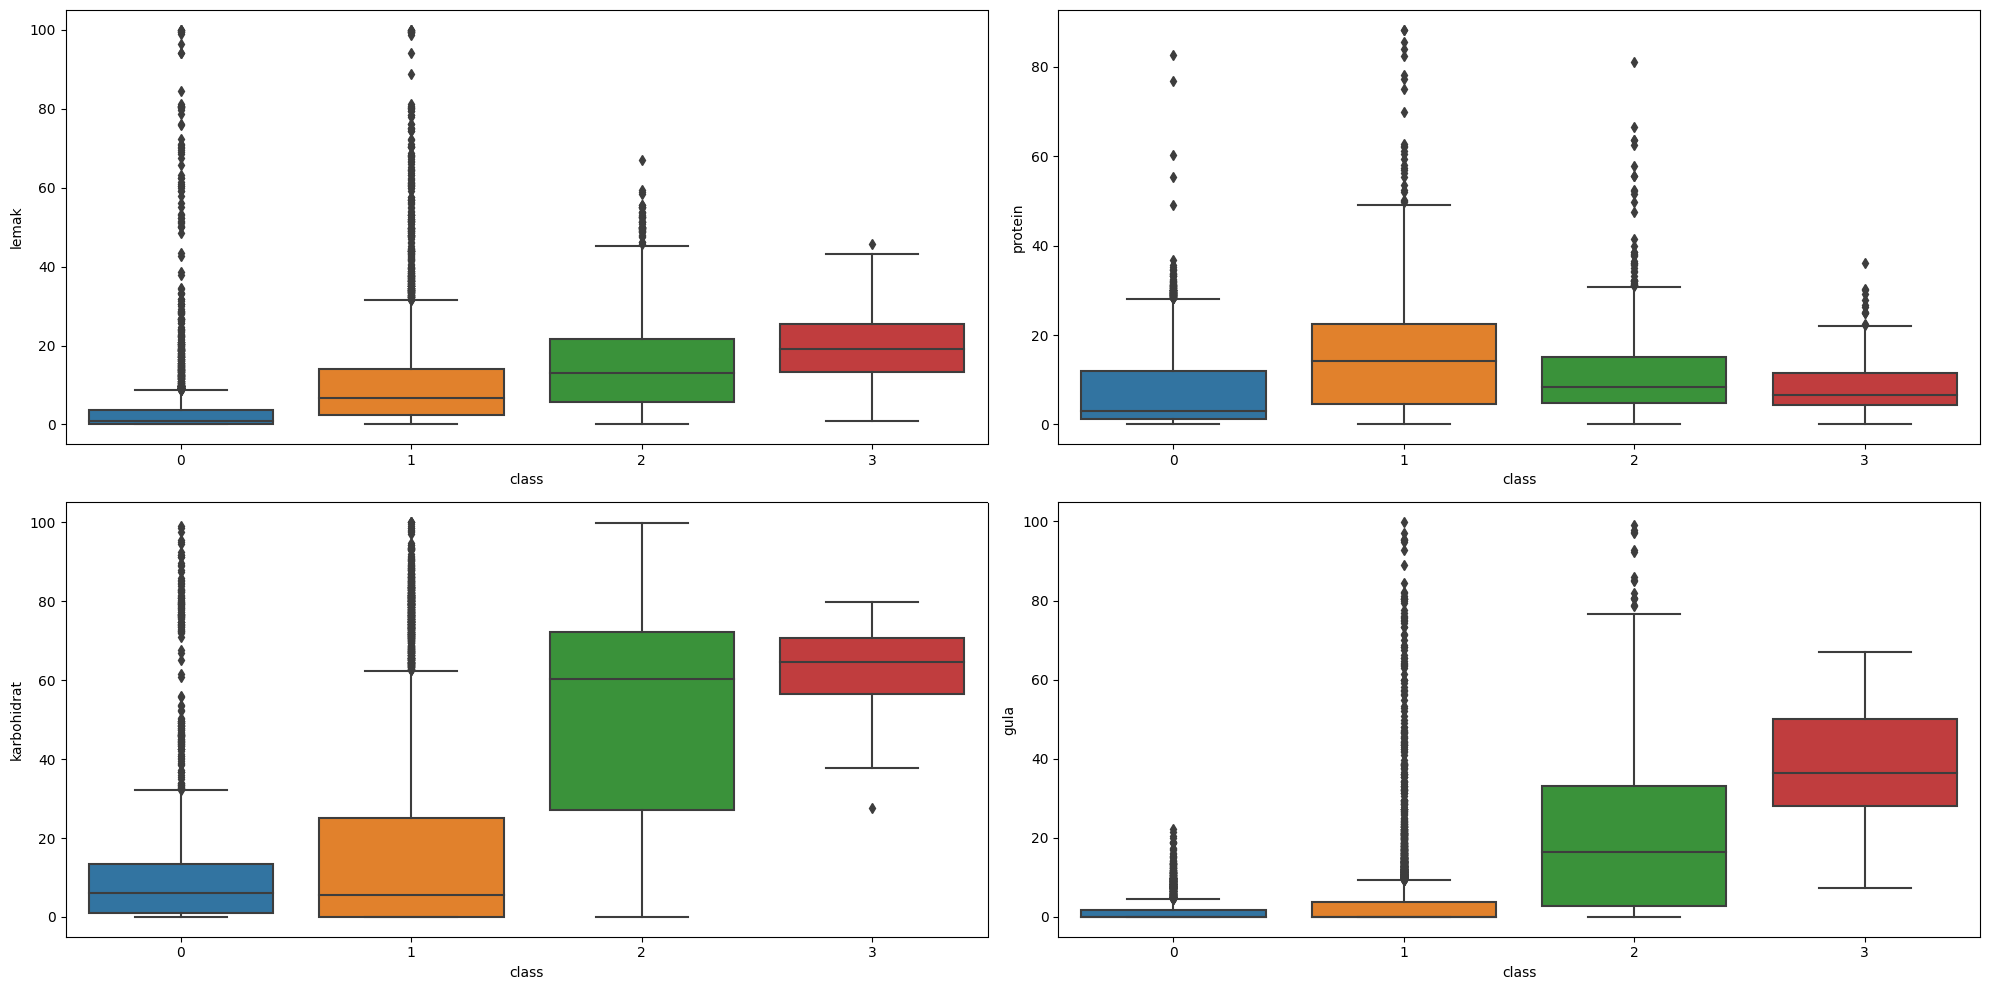

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(data=df, x='class', y=df[num_vars].iloc[:,i], ax=ax[i])

plt.tight_layout()
plt.show()

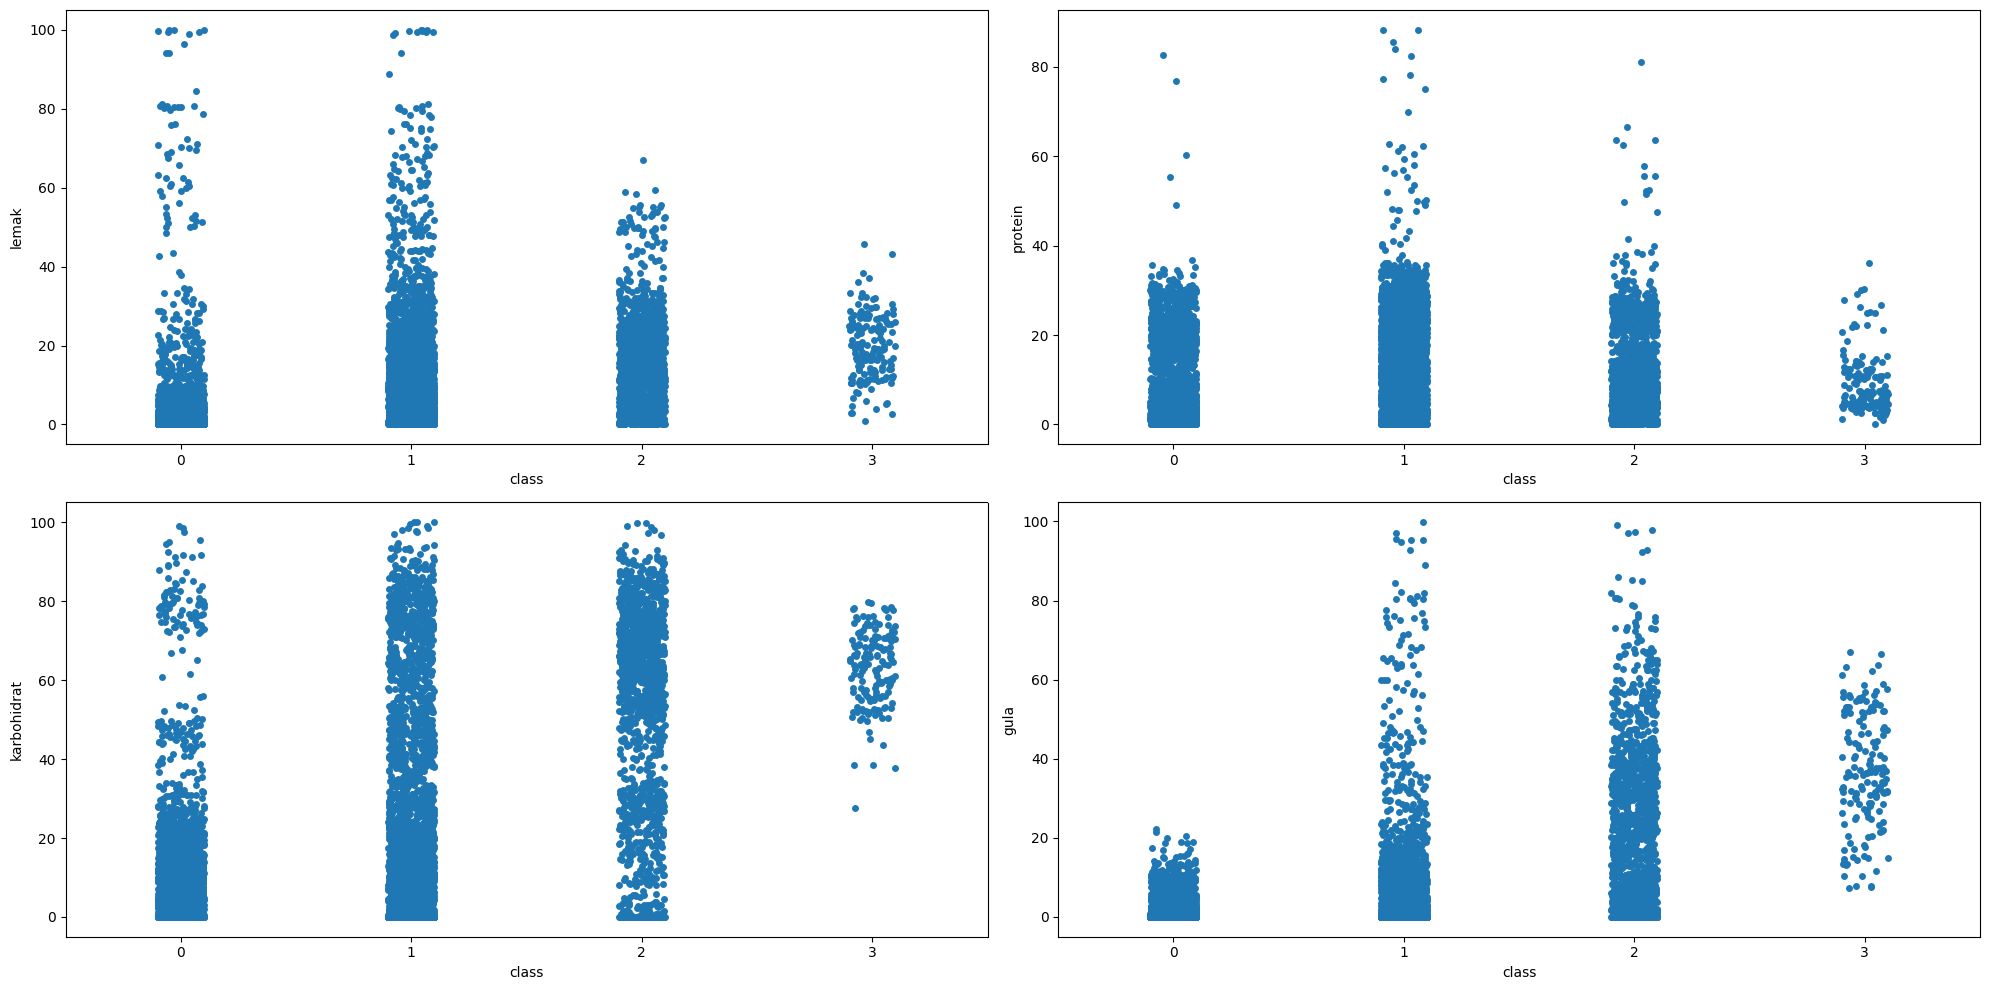

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.stripplot(data=df, x='class', y=df[num_vars].iloc[:,i], ax=ax[i])

plt.tight_layout()
plt.show()

 # Separating Features and Target Variable

In [21]:
X = df[df.columns.difference(['class'])]
y = df['class']
print('Nutrition fact data : {}\nFeatures :{}\nTarget : {}'.format(df.shape, X.shape, y.shape))

Nutrition fact data : (9044, 6)
Features :(9044, 5)
Target : (9044,)


In [22]:
cat_vars = [var for var in X.columns if var not in num_vars]

print('Numerical Variables : {} \nLength : {}'.format(num_vars, len(num_vars)))
print('Categorical Variables : {} \nLength : {}'.format(cat_vars, len(cat_vars)))

Numerical Variables : ['lemak', 'protein', 'karbohidrat', 'gula'] 
Length : 4
Categorical Variables : ['user'] 
Length : 1


# Data Standardization

In [23]:
scaler = StandardScaler()

In [24]:
scaler = ColumnTransformer([('scaler', StandardScaler(), ['lemak', 'protein', 'karbohidrat', 'gula'])], remainder='passthrough')

In [25]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,gula,karbohidrat,lemak,protein,user
0,5.683479,-1.023724,-0.801887,-0.483557,0.0
1,5.461010,-1.058195,-0.698285,-0.483557,2.0
2,7.137839,-1.078303,-0.804099,-0.487969,2.0
3,1.537327,0.943972,-0.717826,-0.451209,3.0
4,1.611747,1.120155,-0.701235,-0.450474,1.0
...,...,...,...,...,...
9039,-0.548813,0.782152,-0.804099,-0.487969,2.0
9040,-0.667568,0.161681,-0.804099,-0.487969,1.0
9041,-0.696861,0.737149,-0.804099,-0.487969,2.0
9042,-0.676277,0.146361,-0.804099,-0.487969,0.0


In [26]:
# One-Hot Encoding untuk data kategori
encoder = OneHotEncoder(sparse=False)
encoded_user = encoder.fit_transform(X_scaled[['user']])

In [27]:
# DataFrame for the encoding
encoded_user_X = pd.DataFrame(encoded_user, columns=encoder.get_feature_names_out(['user']))

In [28]:
encoded_user_X

,user_0.0,user_1.0,user_2.0,user_3.0
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
9039,0.0,0.0,1.0,0.0
9040,0.0,1.0,0.0,0.0
9041,0.0,0.0,1.0,0.0
9042,1.0,0.0,0.0,0.0


In [29]:
# Merge the encoding result with the original X (without the original user column)
X_scaled = X_scaled.drop('user', axis=1)
X = pd.concat([X_scaled, encoded_user_X], axis=1)
X

,gula,karbohidrat,lemak,protein,user_0.0,user_1.0,user_2.0,user_3.0
0,5.683479,-1.023724,-0.801887,-0.483557,1.0,0.0,0.0,0.0
1,5.461010,-1.058195,-0.698285,-0.483557,0.0,0.0,1.0,0.0
2,7.137839,-1.078303,-0.804099,-0.487969,0.0,0.0,1.0,0.0
3,1.537327,0.943972,-0.717826,-0.451209,0.0,0.0,0.0,1.0
4,1.611747,1.120155,-0.701235,-0.450474,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9039,-0.548813,0.782152,-0.804099,-0.487969,0.0,0.0,1.0,0.0
9040,-0.667568,0.161681,-0.804099,-0.487969,0.0,1.0,0.0,0.0
9041,-0.696861,0.737149,-0.804099,-0.487969,0.0,0.0,1.0,0.0
9042,-0.676277,0.146361,-0.804099,-0.487969,1.0,0.0,0.0,0.0


# Data Splitting

In [30]:
#split the train and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state=42)

In [31]:
print('Shape of training features: ', X_train.shape)
print('Shape of val features: ', X_val.shape)
print('Shape of testing features: ', X_test.shape)

Shape of training features:  (7235, 8)
Shape of val features:  (904, 8)
Shape of testing features:  (905, 8)


In [32]:
print('Shape of training target: ', y_train.shape)
print('Shape of val target: ', y_val.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training target:  (7235,)
Shape of val target:  (904,)
Shape of testing target:  (905,)


# Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

value_dropout = 0.3

# Membangun model neural network
model = Sequential()
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(value_dropout))
model.add(Dense(256, activation='relu'))
model.add(Dropout(value_dropout))
model.add(Dense(128, activation='relu'))
model.add(Dropout(value_dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(value_dropout))
model.add(Dense(32, activation='relu'))
model.add(Dropout(value_dropout))
model.add(Dense(4, activation='softmax'))  # 4 kelas output

In [34]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,300 (700.39 KB)

 Trainable params: 179,300 (700.39 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Melatih model
history = model.fit(X_train, y_train, epochs=200, validation_data = (X_val, y_val), verbose=2)

Epoch 1/200


I0000 00:00:1717130316.016610      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


227/227 - 19s - 84ms/step - accuracy: 0.7475 - loss: 0.6321 - val_accuracy: 0.8639 - val_loss: 0.3492
Epoch 2/200
227/227 - 1s - 2ms/step - accuracy: 0.8466 - loss: 0.3942 - val_accuracy: 0.8706 - val_loss: 0.2972
Epoch 3/200
227/227 - 0s - 2ms/step - accuracy: 0.8686 - loss: 0.3408 - val_accuracy: 0.9060 - val_loss: 0.2412
Epoch 4/200
227/227 - 1s - 2ms/step - accuracy: 0.8838 - loss: 0.2954 - val_accuracy: 0.9038 - val_loss: 0.2564
Epoch 5/200
227/227 - 0s - 2ms/step - accuracy: 0.8919 - loss: 0.2740 - val_accuracy: 0.9148 - val_loss: 0.2092
Epoch 6/200
227/227 - 0s - 2ms/step - accuracy: 0.8934 - loss: 0.2638 - val_accuracy: 0.9126 - val_loss: 0.2157
Epoch 7/200
227/227 - 1s - 2ms/step - accuracy: 0.8983 - loss: 0.2557 - val_accuracy: 0.9071 - val_loss: 0.2219
Epoch 8/200
227/227 - 0s - 2ms/step - accuracy: 0.9039 - loss: 0.2444 - val_accuracy: 0.9192 - val_loss: 0.2017
Epoch 9/200
227/227 - 0s - 2ms/step - accuracy: 0.9028 - loss: 0.2321 - val_accuracy: 0.9237 - val_loss: 0.1951
Ep

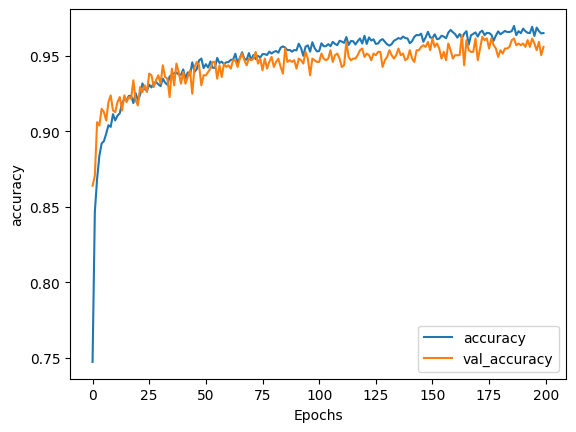

In [37]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+ string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')

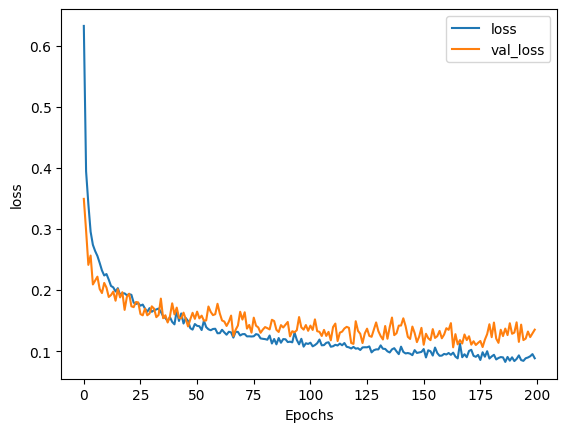

In [38]:
plot_graphs(history, 'loss')

In [39]:
loss,accuracy = model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9668 - loss: 0.0907


In [40]:
accuracy

0.9569060802459717

In [41]:
y_predict = model.predict(X_test)
y_predict_labels = np.argmax(y_predict, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [42]:
# Print the classification report
print(classification_report(y_test, y_predict_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       303
           1       0.98      0.95      0.96       456
           2       0.93      0.96      0.94       135
           3       1.00      0.73      0.84        11

    accuracy                           0.96       905
   macro avg       0.96      0.90      0.93       905
weighted avg       0.96      0.96      0.96       905



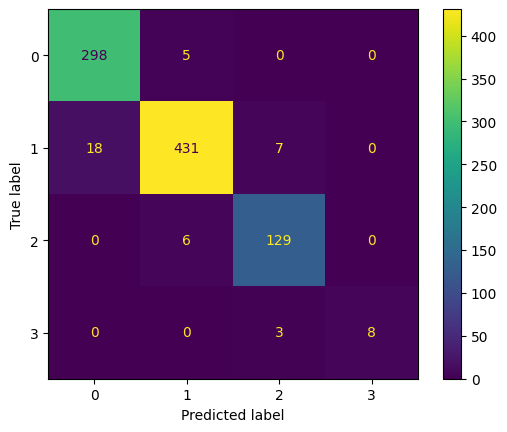

In [43]:
# Mendefinisikan label kelas secara manual
class_labels = [0, 1, 2, 3]

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predict_labels, labels=class_labels)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
disp.plot()
plt.show()

In [44]:
model.save('glucofie_classification.h5')